In [34]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from utils.loader import FactoryLoader
from utils.ml import MLPipeline
from utils.preprocessing import PreprocessingFactory
from utils.feature_extraction import *
from utils.utils import *

VAL_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\val"
TRAIN_PATH = r"C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\train"

In [35]:
percent = 100
random = False

# Initialize the FactoryLoader
factory = PreprocessingFactory()
factory.gaussian_smoothing(5)
factory.clahe()
factory.normalize2float()
factory.pad2square()
factory.resize((150,150))

factory_loader = FactoryLoader(path=VAL_PATH, batch_size=32, factory=factory, percentage=percent, shuffle=random)

# Create the feature extraction pipeline strategy and add desired features
strategy = FeatureExtractionStrategy()

strategy.add_extractor(MeanExtractor())  # Add mean feature
strategy.add_extractor(StdExtractor())   # Add standard deviation feature
strategy.add_extractor(VarExtractor())   # Add variance feature

strategy.add_extractor(MeanExtractor("lab"))   # Add mean feature
strategy.add_extractor(StdExtractor("lab"))   # Add standard deviation feature
strategy.add_extractor(VarExtractor("lab"))   # Add variance feature

strategy.add_extractor(MeanExtractor("hsv"))   # Add mean feature
strategy.add_extractor(StdExtractor("hsv"))   # Add standard deviation feature
strategy.add_extractor(VarExtractor("hsv"))   # Add variance feature

strategy.add_extractor(LBPExtractor(radius=1, n_points=8))
strategy.add_extractor(LBPExtractor(radius=1, n_points=16))

strategy.add_extractor(GLCMExtractor(properties=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation',]))

pipeline = MLPipeline(dataset_path=TRAIN_PATH, preprocessing_factory=factory, feature_strategy=strategy, classifiers=[], percentage=percent, verbose=True, shuffle=random)

INFO:utils.ml:MLPipeline initialized with dataset path: C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\train
INFO:utils.ml:Preprocessing steps


In [36]:
pipeline.loader.get_transformation_steps()

{'smoothing': {'kernel_size': 5},
 'clahe': {'clip_limit': 2.0, 'tile_grid_size': (8, 8)},
 '01_norm': {},
 'pad2square': {'fill': nan},
 'resize': {'size': (150, 150)}}

In [37]:
pipeline.get_feature_names()

['mean_rgb_channel_0',
 'mean_rgb_channel_1',
 'mean_rgb_channel_2',
 'std_rgb_channel_0',
 'std_rgb_channel_1',
 'std_rgb_channel_2',
 'var_rgb_channel_0',
 'var_rgb_channel_1',
 'var_rgb_channel_2',
 'mean_lab_channel_0',
 'mean_lab_channel_1',
 'mean_lab_channel_2',
 'std_lab_channel_0',
 'std_lab_channel_1',
 'std_lab_channel_2',
 'var_lab_channel_0',
 'var_lab_channel_1',
 'var_lab_channel_2',
 'mean_hsv_channel_0',
 'mean_hsv_channel_1',
 'mean_hsv_channel_2',
 'std_hsv_channel_0',
 'std_hsv_channel_1',
 'std_hsv_channel_2',
 'var_hsv_channel_0',
 'var_hsv_channel_1',
 'var_hsv_channel_2',
 'lbp_rad1_bins8_0',
 'lbp_rad1_bins8_1',
 'lbp_rad1_bins8_2',
 'lbp_rad1_bins8_3',
 'lbp_rad1_bins8_4',
 'lbp_rad1_bins8_5',
 'lbp_rad1_bins8_6',
 'lbp_rad1_bins8_7',
 'lbp_rad1_bins8_8',
 'lbp_rad1_bins8_9',
 'lbp_rad1_bins16_0',
 'lbp_rad1_bins16_1',
 'lbp_rad1_bins16_2',
 'lbp_rad1_bins16_3',
 'lbp_rad1_bins16_4',
 'lbp_rad1_bins16_5',
 'lbp_rad1_bins16_6',
 'lbp_rad1_bins16_7',
 'lbp_rad1_

In [ ]:
pipeline.run_feature_extraction()

INFO:utils.ml:Running feature extraction...


Processed 5/634 batches.
Processed 10/634 batches.
Processed 15/634 batches.
Processed 20/634 batches.
Processed 25/634 batches.
Processed 30/634 batches.
Processed 35/634 batches.
Processed 40/634 batches.
Processed 45/634 batches.
Processed 50/634 batches.
Processed 55/634 batches.
Processed 60/634 batches.
Processed 65/634 batches.
Processed 70/634 batches.
Processed 75/634 batches.
Processed 80/634 batches.
Processed 85/634 batches.
Processed 90/634 batches.
Processed 95/634 batches.
Processed 100/634 batches.


In [6]:
print(pipeline.feature_matrix.shape)

(15195, 54)


In [7]:
df = pd.DataFrame(data=pipeline.feature_matrix, columns=pipeline.get_feature_names())

pipeline.save_feature_matrix_to_excel()

INFO:utils.ml:Saving feature matrix to Excel...
INFO:utils.ml:Feature matrix saved to ./features_smoothing_clahe_01_norm_pad2square_resize.xlsx


'./features_smoothing_clahe_01_norm_pad2square_resize.xlsx'

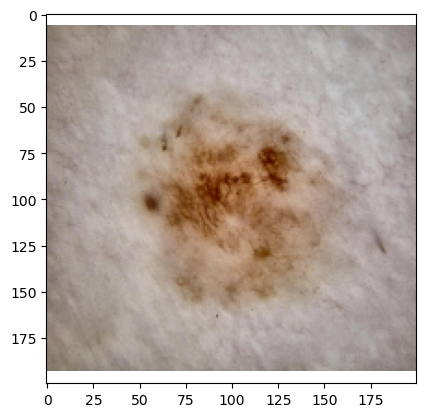

In [8]:
from matplotlib import pyplot as plt

im = pipeline.loader.get_element_by_id(0)[0]



plt.imshow(pipeline.loader.get_element_by_id(1585)[0])

In [9]:
im = pipeline.loader.get_element_by_id(1585)[0]

var = VarExtractor(color_space="rgb")
var.extract(im)

array([nan, nan, nan], dtype=float32)

In [10]:
a = pipeline.feature_matrix[np.isnan(pipeline.feature_matrix)]

np.where(np.isnan(pipeline.feature_matrix))

(array([ 1585,  1585,  1585,  1585,  1585,  1585,  1585,  1585,  1585,
        14451, 14451, 14451, 14451, 14451, 14451, 14451, 14451, 14451],
       dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64))

In [11]:
def predict_with_classifiers(self, new_dataset_path, percentage=100):
    """
    Predicts the output for a new dataset using all fitted classifiers and stores the results.

    Args:
    new_dataset_path: The path to the new dataset for prediction.

    Returns:
    A dictionary containing the predictions from all classifiers.
    """
    if not self.fitted_classifiers:
        raise RuntimeError("Classifiers must be fitted before making predictions.")

    if self.verbose:
        logger.info("Predicting with classifiers on dataset: %s", new_dataset_path)

    # Load and extract features from the new dataset
    new_loader = FactoryLoader(path=new_dataset_path, factory=self.loader.get_factory(), percentage=percentage)
    new_feature_matrix, new_labels = self.feature_strategy.run(new_loader.get_loader())

    # Store predictions in the class attribute
    self.predictions = {"GT": new_labels, }
    for clf_name, clf in self.fitted_classifiers.items():

        self.predictions[clf_name] = clf.predict(new_feature_matrix)
        if self.verbose:
            logger.info("Predictions made with classifier: %s", clf_name)

    return self.predictions


In [28]:
#rf1 = RandomForestClassifier(n_estimators=100)
#rf2 = RandomForestClassifier(n_estimators=150)
#rf3 = RandomForestClassifier(n_estimators=250)

# svm1 = SVC(kernel='linear', C=1)
# svm2 = SVC(kernel='linear', C=1.5)
# svm3 = SVC(kernel='linear', C=2)
# 
# svm6 = SVC(kernel='rbf', C=1)
# svm7 = SVC(kernel='rbf', C=1.5)
# svm8 = SVC(kernel='rbf', C=2)

xgb1 = XGBClassifier(n_estimators=250)
xgb2 = XGBClassifier(n_estimators=350)
xgb3 = XGBClassifier(n_estimators=450)

pipeline.classifiers = [
                        # rf1, rf2, rf3,
                        # svm1, svm2, svm3, svm6, svm7, svm8,
                        xgb1, xgb2, xgb3]

In [29]:
pipeline.fit_classifiers()

INFO:utils.ml:Fitting classifiers...
INFO:utils.ml:Fitting classifier: XGBClassifier0
INFO:utils.ml:Fitted classifier: XGBClassifier0; Done in 0.808474063873291 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier1
INFO:utils.ml:Fitted classifier: XGBClassifier1; Done in 0.9173550605773926 seconds
INFO:utils.ml:Fitting classifier: XGBClassifier2
INFO:utils.ml:Fitted classifier: XGBClassifier2; Done in 1.1338310241699219 seconds
INFO:utils.ml:Fitting completed in 2.86 seconds.


In [30]:
pipeline.predict_with_classifiers(VAL_PATH)

INFO:utils.ml:Predicting with classifiers on dataset: C:\Users\gimes\Src\repos\CADx-Project\dataset\binary\val


Processed 5/119 batches.
Processed 10/119 batches.
Processed 15/119 batches.
Processed 20/119 batches.
Processed 25/119 batches.
Processed 30/119 batches.
Processed 35/119 batches.
Processed 40/119 batches.
Processed 45/119 batches.
Processed 50/119 batches.
Processed 55/119 batches.
Processed 60/119 batches.
Processed 65/119 batches.
Processed 70/119 batches.
Processed 75/119 batches.
Processed 80/119 batches.
Processed 85/119 batches.
Processed 90/119 batches.
Processed 95/119 batches.
Processed 100/119 batches.
Processed 105/119 batches.
Processed 110/119 batches.
Processed 115/119 batches.


INFO:utils.ml:Predictions made with classifier: XGBClassifier0
INFO:utils.ml:Predictions made with classifier: XGBClassifier1
INFO:utils.ml:Predictions made with classifier: XGBClassifier2


Processed 119/119 batches.


{'GT': array([0, 0, 0, ..., 1, 1, 1]),
 'XGBClassifier0': array([0, 0, 0, ..., 1, 0, 1]),
 'XGBClassifier1': array([0, 0, 1, ..., 0, 0, 1]),
 'XGBClassifier2': array([0, 0, 0, ..., 1, 0, 1])}

In [31]:
pipeline.calculate_metrics()

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}
INFO:utils.ml:Metrics for classifier XGBClassifier0: {'accuracy': 0.8034773445732349, 'precision': 0.80351108276243, 'recall': 0.8034773445732349, 'f1': 0.8034861839799498}
INFO:utils.ml:Metrics for classifier XGBClassifier1: {'accuracy': 0.8021601685985248, 'precision': 0.8021620653366097, 'recall': 0.8021601685985248, 'f1': 0.8021610612913397}
INFO:utils.ml:Metrics for classifier XGBClassifier2: {'accuracy': 0.8003161222339304, 'precision': 0.8003427548327536, 'recall': 0.8003161222339304, 'f1': 0.8003238842251696}


{'GT': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0},
 'XGBClassifier0': {'accuracy': 0.8034773445732349,
  'precision': 0.80351108276243,
  'recall': 0.8034773445732349,
  'f1': 0.8034861839799498},
 'XGBClassifier1': {'accuracy': 0.8021601685985248,
  'precision': 0.8021620653366097,
  'recall': 0.8021601685985248,
  'f1': 0.8021610612913397},
 'XGBClassifier2': {'accuracy': 0.8003161222339304,
  'precision': 0.8003427548327536,
  'recall': 0.8003161222339304,
  'f1': 0.8003238842251696}}

In [33]:
df = pd.DataFrame(data=pipeline.calculate_metrics())
df.T

INFO:utils.ml:Metrics for classifier GT: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}
INFO:utils.ml:Metrics for classifier XGBClassifier0: {'accuracy': 0.8034773445732349, 'precision': 0.80351108276243, 'recall': 0.8034773445732349, 'f1': 0.8034861839799498}
INFO:utils.ml:Metrics for classifier XGBClassifier1: {'accuracy': 0.8021601685985248, 'precision': 0.8021620653366097, 'recall': 0.8021601685985248, 'f1': 0.8021610612913397}
INFO:utils.ml:Metrics for classifier XGBClassifier2: {'accuracy': 0.8003161222339304, 'precision': 0.8003427548327536, 'recall': 0.8003161222339304, 'f1': 0.8003238842251696}


,accuracy,precision,recall,f1
GT,1.000000,1.000000,1.000000,1.000000
XGBClassifier0,0.803477,0.803511,0.803477,0.803486
XGBClassifier1,0.802160,0.802162,0.802160,0.802161
XGBClassifier2,0.800316,0.800343,0.800316,0.800324


In [20]:
pipeline.get_feature_names()

['mean_rgb_channel_0',
 'mean_rgb_channel_1',
 'mean_rgb_channel_2',
 'std_rgb_channel_0',
 'std_rgb_channel_1',
 'std_rgb_channel_2',
 'var_rgb_channel_0',
 'var_rgb_channel_1',
 'var_rgb_channel_2',
 'std_lab_channel_0',
 'std_lab_channel_1',
 'std_lab_channel_2',
 'var_lab_channel_0',
 'var_lab_channel_1',
 'var_lab_channel_2',
 'std_hsv_channel_0',
 'std_hsv_channel_1',
 'std_hsv_channel_2',
 'var_hsv_channel_0',
 'var_hsv_channel_1',
 'var_hsv_channel_2',
 'lbp_rad1_bins8_0',
 'lbp_rad1_bins8_1',
 'lbp_rad1_bins8_2',
 'lbp_rad1_bins8_3',
 'lbp_rad1_bins8_4',
 'lbp_rad1_bins8_5',
 'lbp_rad1_bins8_6',
 'lbp_rad1_bins8_7',
 'lbp_rad1_bins8_8',
 'lbp_rad1_bins8_9',
 'lbp_rad1_bins16_0',
 'lbp_rad1_bins16_1',
 'lbp_rad1_bins16_2',
 'lbp_rad1_bins16_3',
 'lbp_rad1_bins16_4',
 'lbp_rad1_bins16_5',
 'lbp_rad1_bins16_6',
 'lbp_rad1_bins16_7',
 'lbp_rad1_bins16_8',
 'lbp_rad1_bins16_9',
 'lbp_rad1_bins16_10',
 'lbp_rad1_bins16_11',
 'lbp_rad1_bins16_12',
 'lbp_rad1_bins16_13',
 'lbp_rad1_bi